In [1]:
# Importing the Velkoz signal processing library:
from signal_processing.core_signal_objects import AudioSignal

# Importing data manipulation packages:
import pandas as pd

# Importing visualization packages:
import matplotlib.pyplot as plt

/Users/matthewteelucksingh/miniconda3/envs/signal_processing/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


../data/ESC-50-master/audio/1-100032-A-0.wav


100%|██████████| 99/99 [00:00<00:00, 15669.29it/s]


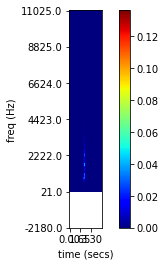

(99, 551)


In [2]:
"Extracting wav audio files from the ESC-50 Dataset:"

# Extracting the ESC-50 csv file with audio file data labels:
esc50_metadata = pd.read_csv("../data/ESC-50-master/meta/esc50.csv")
audio_file_dir_path = "../data/ESC-50-master/audio"

# A Dog audio sound:
test_dog_path = audio_file_dir_path + f"/{esc50_metadata['filename'][0]}"
print(test_dog_path)

# Creating AudioSignal and performing all data transformations on it:
dog_signal = AudioSignal("../data/ESC-50-master/audio/1-100032-A-0.wav") 
dog_signal._perform_short_term_feature_extraction()
dog_signal._calculate_spectogram()
dog_signal._calculate_fast_fourier_transform()

In [3]:
print(dog_signal.specgram)

[[3.02957116e-07 1.45754885e-23 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.15520612e-26]
 [3.02957116e-07 1.45754885e-23 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.15520612e-26]
 [3.02957116e-07 1.45754885e-23 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.15520612e-26]
 ...
 [3.02957116e-07 1.45754885e-23 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.15520612e-26]
 [3.02957116e-07 1.45754885e-23 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.15520612e-26]
 [3.02957116e-07 1.45754885e-23 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.15520612e-26]]
